In [119]:
%matplotlib inline
import pandas as pd

In [120]:
data = pd.read_csv('results.csv')

In [121]:
len(data)

23342

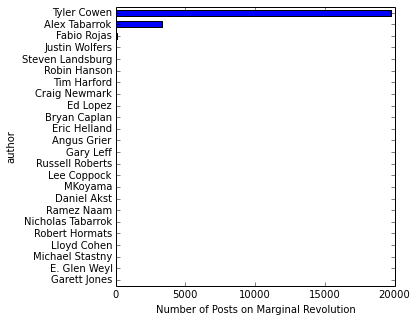

In [122]:
num_posts_by_author = data.groupby('author').size().sort_values(ascending = True)
num_posts_by_author_plot = num_posts_by_author.plot('barh', figsize=(5,5))
num_posts_by_author_plot.set_xlabel('Number of Posts on Marginal Revolution')

fig = num_posts_by_author_plot.get_figure()
fig.savefig('num_posts_by_author_plot.png', bbox_inches="tight")
num_posts_by_author_plot

In [123]:
#Getting the links to all the posts for a given author (Tim Harford in this case)
for x in set(data[data['author'] == 'Tim Harford']['permalink']):
    print x

http://marginalrevolution.com/marginalrevolution/2005/07/dear_economist_-2.html
http://marginalrevolution.com/marginalrevolution/2005/07/using_cartoons_.html
http://marginalrevolution.com/marginalrevolution/2005/07/marginal_revolu-2.html
http://marginalrevolution.com/marginalrevolution/2005/07/we_shall_see_ho.html
http://marginalrevolution.com/marginalrevolution/2005/07/markets_in_ever_6-2.html
http://marginalrevolution.com/marginalrevolution/2005/12/seasonal_advice.html
http://marginalrevolution.com/marginalrevolution/2005/12/seasonal_advice_2.html
http://marginalrevolution.com/marginalrevolution/2005/07/john_kay_on_cli.html
http://marginalrevolution.com/marginalrevolution/2005/12/seasonal_advice_1.html
http://marginalrevolution.com/marginalrevolution/2005/07/choosing_whethe.html
http://marginalrevolution.com/marginalrevolution/2005/07/what_is_the_rig-2.html
http://marginalrevolution.com/marginalrevolution/2005/07/a_critic_on_cri.html
http://marginalrevolution.com/marginalrevolution/2

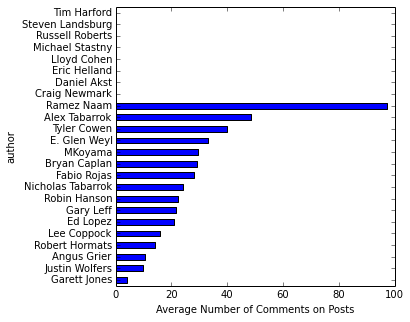

In [124]:
#Which authors create the most discussion
author_avg_comments = data.groupby('author')['num_comments'].mean().sort_values(ascending = True)
author_avg_comments_plot = author_avg_comments.plot('barh', figsize=(5,5))
author_avg_comments_plot.set_xlabel('Average Number of Comments on Posts')

fig = author_avg_comments_plot.get_figure()
fig.savefig('author_avg_comments_plot.png', bbox_inches="tight")

author_avg_comments_plot

In [126]:
#Get information on the posting habits of various posters - time of day.
data['date'] = pd.to_datetime(data['date'])
data['hour_created'] = [x.hour for x in data['date']]

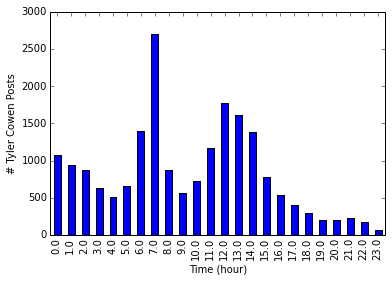

In [127]:
cowen_posts = data[data['author'] == 'Tyler Cowen']
tabarrok_posts = data[data['author'] == 'Alex Tabarrok']
cowen_time_post_plot = cowen_posts['hour_created'].value_counts().sort_values().sort_index().plot(kind='bar')

cowen_time_post_plot.set_ylabel('# Tyler Cowen Posts')
cowen_time_post_plot.set_xlabel('Time (hour)')

fig = cowen_time_post_plot.get_figure()
fig.savefig('cowen_time_post_plot.png', bbox_inches="tight")

cowen_time_post_plot

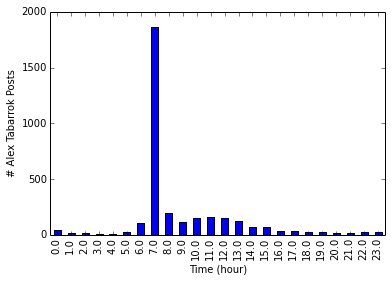

In [128]:
tabarrok_time_post_plot = tabarrok_posts['hour_created'].value_counts().sort_values().sort_index().plot(kind='bar')
tabarrok_time_post_plot.set_ylabel('# Alex Tabarrok Posts')
tabarrok_time_post_plot.set_xlabel('Time (hour)')

fig = tabarrok_time_post_plot.get_figure()
fig.savefig('tabarrok_time_post_plot.png', bbox_inches="tight")

tabarrok_time_post_plot

In [129]:
set(data['tags'])

{nan,
 'Books',
 'Current Affairs',
 'Data Source',
 'Economics',
 'Education',
 'Film',
 'Food and Drink',
 'Games',
 'History',
 'Law',
 'Medicine',
 'Music',
 'Philosophy',
 'Political Science',
 'Religion',
 'Science',
 'Sports',
 'Television',
 'The Arts',
 'Travel',
 'Travels',
 'Uncategorized',
 'Web/Tech',
 'Weblogs',
 'in Uncategorized'}

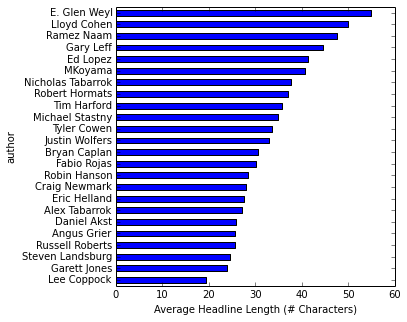

In [130]:
#Can also get some information about the writing habits and techniques
#One particularly important part of a blog post is the headline.
#Lets compare headline length by author
data['headline_length'] = data['headline'].str.len()
author_headline_length = data.groupby('author')['headline_length'].mean().sort_values(ascending = True)
author_headline_length_plot = author_headline_length.plot('barh', figsize=(5,5))
author_headline_length_plot.set_xlabel('Average Headline Length (# Characters)')

fig = author_headline_length_plot.get_figure()
fig.savefig('author_headline_length_plot.png', bbox_inches="tight")

author_headline_length_plot

In [131]:
data[['headline', 'headline_length']].sort_values(by=['headline_length'], ascending = False)[0:10]

,headline,headline_length
28,“The Icelandic Stock Exchange fell by 76% in e...,117
3006,“McAllen And El Paso Revisited: Medicare Varia...,112
2411,The marginal cost of cryptocurrency — does the...,107
2182,Restaurant matching markets in everything thos...,106
17531,The increasing velocity of goods is a deflatio...,106
20761,Luxury potato chip markets in everything truff...,105
10283,The benefits of international trade are usuall...,104
19302,Marginal increments of military spending track...,104
8136,Browse every book hyperlink ever posted on Mar...,103
5901,A small step toward cosmopolitan efficiency an...,101


In [132]:
for idx, x in data[['headline', 'headline_length']].sort_values(by=['headline_length'], ascending = False)[0:10].iterrows():
    print x['headline']
    print ''

“The Icelandic Stock Exchange fell by 76% in early trading as it re-opened after closing for two days last week.”

“McAllen And El Paso Revisited: Medicare Variations Not Always Reflected In The Under-Sixty-Five Population”

The marginal cost of cryptocurrency — does the price of Bitcoin have to fall so much from contestability?

Restaurant matching markets in everything those new service sector jobs use my ethnic dining guide instead

The increasing velocity of goods is a deflationary pressure (rental markets in everything Average is Over)

Luxury potato chip markets in everything truffle seaweed from the waters around the Faroe Islands edition

The benefits of international trade are usually greater than you think, belated St. Patrick’s Day post

Marginal increments of military spending track gdp better than well-being or actual economic performance

Browse every book hyperlink ever posted on Marginal Revolution (is this the second best web site ever?)

A small step toward cosmopolit

In [133]:
#Ideas
#What blog post tags get the most comments?
#What are the topics the bloggers are most likely to blog about

In [125]:
#How has engagement with the blog evolved over time (sum of num_comments by date)